## Data Science Academy

### Análise de Dados com Linguagem Python

#### Projeto 8

#### Engenharia de Atributos em Dados Médicos - Parte 2

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Análise Exploratória

Estamos importando o dataset gerando ao final da Parte 1 do Projeto 8

In [2]:
# Carregando os dados
dados = pd.read_csv("dados_partel.csv")

In [3]:
# Visualizando os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,0,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,0,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,0,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


In [4]:
# Shape
dados.shape

(68629, 24)

In [5]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68629 entries, 0 to 68628
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              68629 non-null  int64 
 1   patient_nbr               68629 non-null  int64 
 2   race                      68629 non-null  object
 3   gender                    68629 non-null  int64 
 4   age                       68629 non-null  object
 5   admission_type_id         68629 non-null  object
 6   discharge_disposition_id  68629 non-null  object
 7   admission_source_id       68629 non-null  object
 8   time_in_hospital          68629 non-null  int64 
 9   num_lab_procedures        68629 non-null  int64 
 10  num_procedures            68629 non-null  int64 
 11  num_medications           68629 non-null  int64 
 12  number_outpatient         68629 non-null  int64 
 13  number_emergency          68629 non-null  int64 
 14  number_inpatient      

#### 1 - Total de Medicamentos Consumidos Por Faixa Etária

A faixa etária de pacientes entre 70-80 é a que mais consome medicamentos

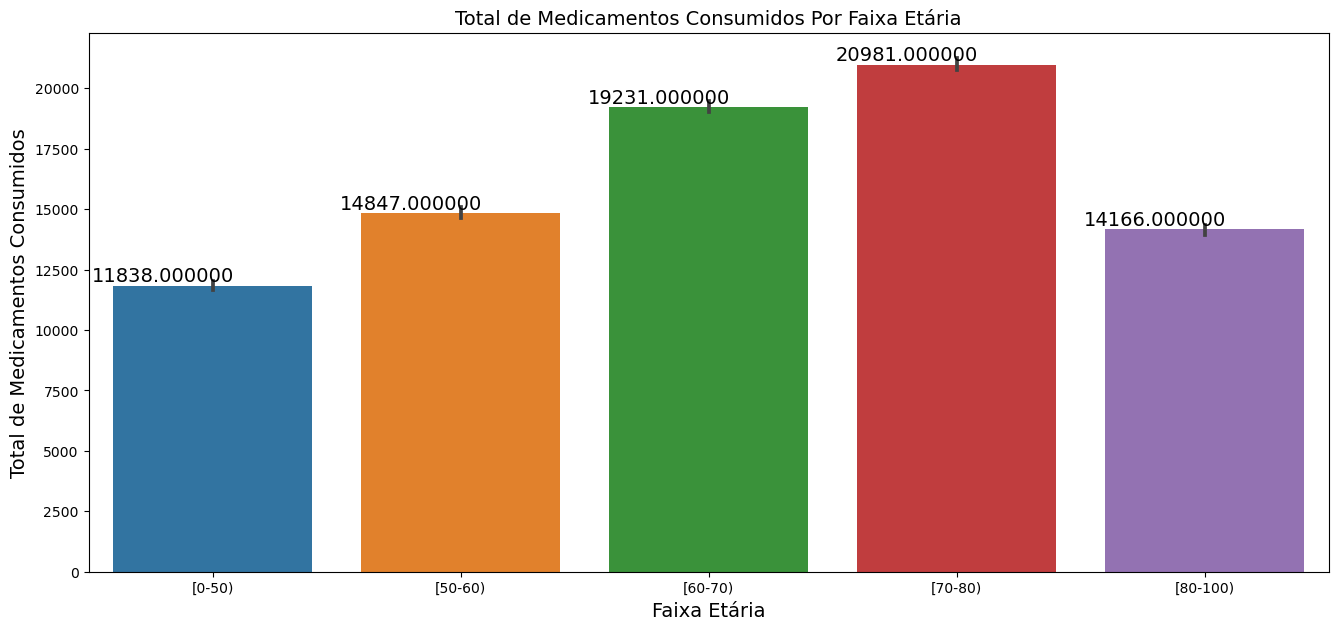

In [6]:
# Tamanho da figura
plt.figure(figsize = (16, 7))

# Criação do gráfico de barras
figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = dados)

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Medicamentos Consumidos", fontsize = 14, color = 'black')

# Título
plt.title("Total de Medicamentos Consumidos Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom',
                  fontsize = 14,
                  color = 'black')

# Mostra o gráfico
plt.show()

#### 2 - Total de Readmissão de Pacientes Diabéticos Por Genero

Pacientes do sexo feminino tem número maior de readmissão

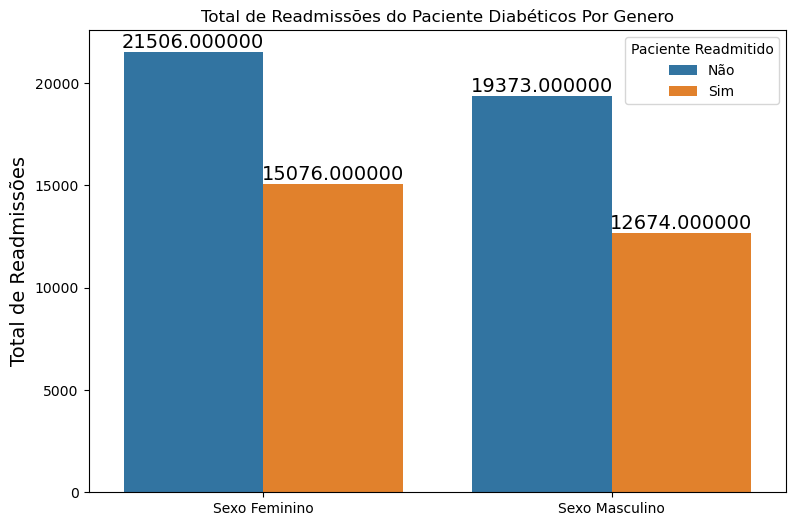

In [7]:
# Criação do gráfico de barras com label enconding
figx = sns.countplot(x = [('Sexo Feminino' if x == 0 else 'Sexo Masculino') for x in dados['gender']],
                     hue = 'readmitted',
                     data = dados)

# Tamanho da figura em polegadas
figx.figure.set_size_inches(9, 6)

# Legenda
figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Label eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título 
figx.axes.set_title('Total de Readmissões do Paciente Diabéticos Por Genero')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom',
                  fontsize = 14,
                  color = 'black')
    
# Mostra o gráfico
plt.show()

#### 3 - Total de Readmissões de Pacientes Por Faixa Etária 

 A faixa etária de pacientes entre 70-80 é a que tem o maior número de readmissões

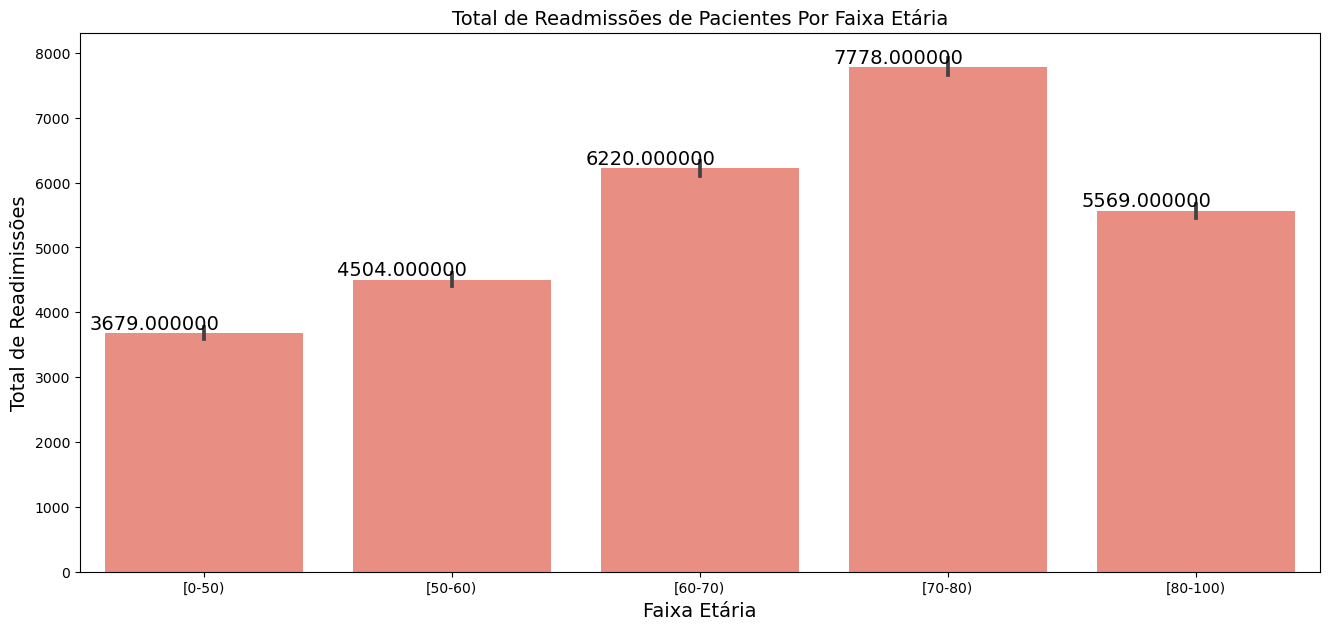

In [8]:
# Tamanho da figura
plt.figure(figsize = (16, 7))

# Criação do gráfico de barras
figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = dados, color = 'salmon')

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Readimissões", fontsize = 14, color = 'black')

# Título
plt.title("Total de Readmissões de Pacientes Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom',
                  fontsize = 14,
                  color = 'black')
    
# Mostra o Gráfico
plt.show()

In [10]:
dados['readmitted'].value_counts()

0    40879
1    27750
Name: readmitted, dtype: int64

#### 4 - Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária

A faixa etária de pacientes entre 70-80 tem o maior percentual de readmissões, enquanto a faixa entária de 0-50 anos tem o menor percentual.

In [11]:
# Primeiro calculamos os percentuais
percentual_idade_readmissao = pd.crosstab(dados.age, dados.readmitted, margins = True, normalize = 'index') * 100
percentual_idade_readmissao

readmitted,0,1
age,,
[0-50),64.915125,35.084875
[50-60),62.463539,37.536461
[60-70),59.647074,40.352926
[70-80),55.912028,44.087972
[80-100),57.449572,42.550428
All,59.565198,40.434802


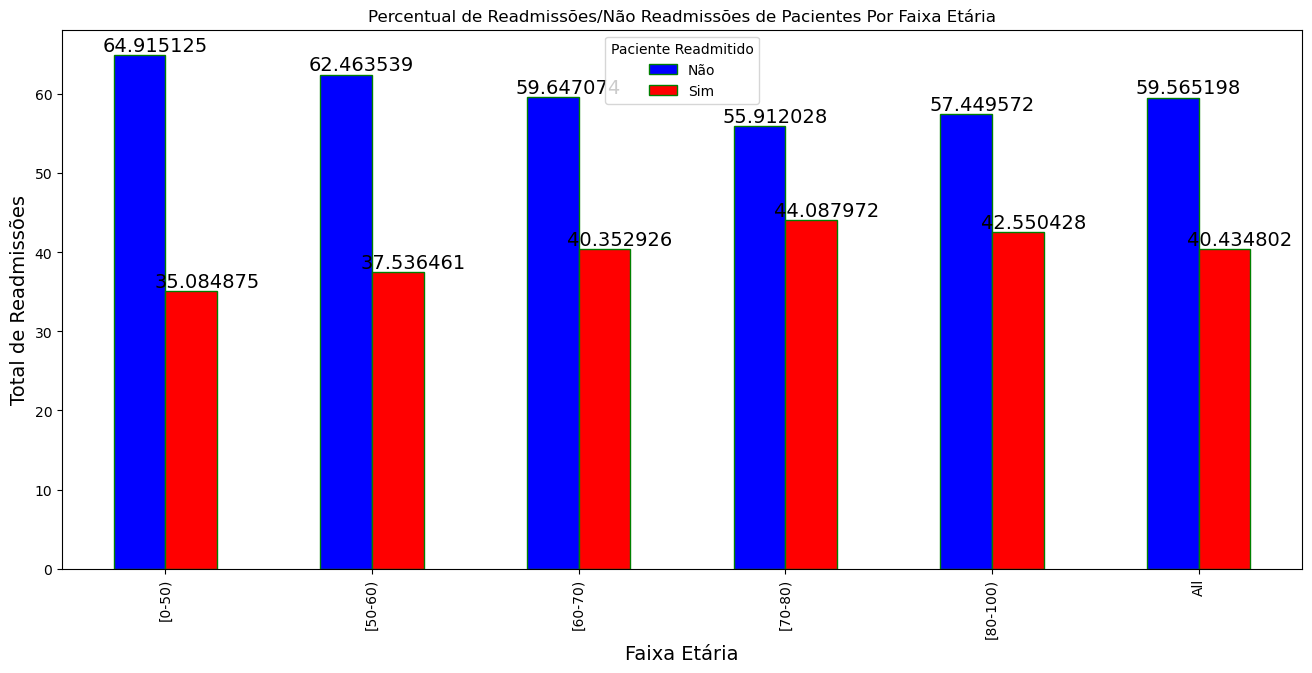

In [16]:
# Cria o gráfico
# Observe que chamamos o plot a partir do dataframe usando nesse caso o Matplotlib
fig = percentual_idade_readmissao.plot(kind = 'bar',
                                       figsize = (16, 7),
                                       width = 0.5,
                                       edgecolor = 'g',
                                       color = ['b', 'r'])

# Legenda
plt.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título 
plt.title("Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária", fontsize = 12)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:0f}'.format(p.get_height()),
                 (p.get_x() + 0.2, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 fontsize = 14,
                 color = 'black')
    
# Mostrar o gráfico
plt.show()


#### 5 - Total de Readmissões de Pacientes Por Gênero, Por idade e Por Tipo de Admissão

Mulheres na faixa de 70-80 anos tem um número maior de readmissões por emergência.

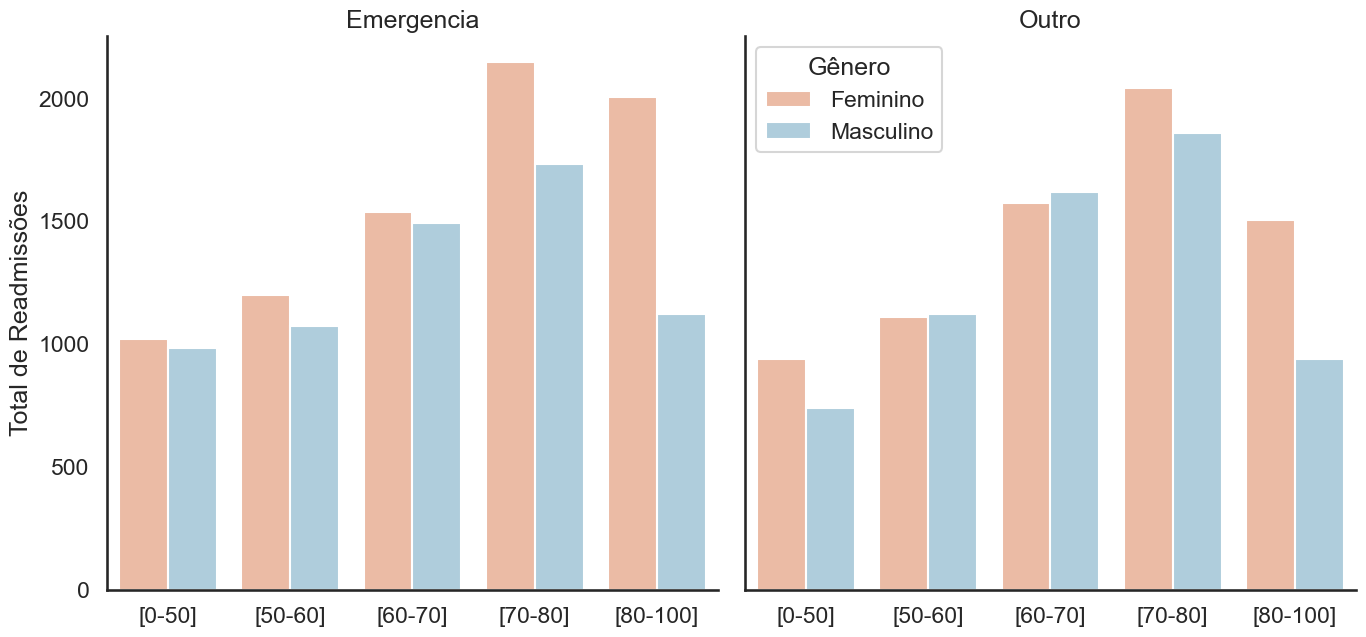

In [17]:
# Vamos incluir o backgroud
sns.set(style = 'white', context = "talk")

# Criação do gráfico de barras com catplot
# https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
g = sns.catplot(x = 'age',
                y = 'readmitted',
                hue = 'gender',
                col = 'admission_type_id',
                estimator = np.sum,
                data = dados,
                palette = "RdBu",
                kind = "bar",
                height = 7,
                aspect = 1,
                legend = False,
                ci = None)

# Labels
(g.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["[0-50]", "[50-60]", "[60-70]", "[70-80]", "[80-100]"])
 .set_titles("{col_name}"))

# Legenda
plt.legend(title = 'Gênero', loc = 'upper left', labels = ['Feminino', 'Masculino'])

# Mostra o gráfico
plt.show(g)